Student performence Indicator

Life cycle of ML project

1. Undersyanding the problem Statement
2. Data Collection
3. Data Checks to perform
4. Expolratory data analysis
5. data pre-processing
6. Model training 
7. Chosse the best model



1. Problem statement- 

   This project is to understand how students performence is effected by other variables such as Gender,Ethencity, Parental levelof education, Lunch and test prepration score.

2. Data Collection - 

   Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    Data consists of 8 column and 1000 rows.

In [45]:
### Importing data and Important pacakges

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
""""Importing the CSV file"""

data = pd.read_csv("./data/data.csv")

In [4]:
"""Showing top 5 view of the data"""

data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
### Shape of the data
data.shape

(1000, 8)

Data Information

1. Gender : Sex of the student (Male/Female)
2. Race/Ethencity : ethnicity of the student(group A/B/C)
3. parental level of education -  Has the details of the parent's education (highest of both parents has been considered)
4. Lunch :  Having lunch before test
5. test prep course - completed or not
6. Math Score - score in math
7. reading Score- score in reading
8. writing score - score in writing

Data Checks to perform

1. checks missing values
2. checks duplicate
3. check data type
4. Check the number of values in the each column
5. Check stastics of data set
6. Check various categories present in the different catagorical column

In [6]:
""" Check missing values """

data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values

In [8]:
###Check duplicates 

data.duplicated().sum()

0

There is no duplicate data

In [9]:
### checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
### Checking the number of unique values in each coulmn

data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
#checking the stat of the dataset
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

    - From above description of numerical data, all means are very close to each other between 66 to68
    - All standard deviation are also very close between 14.6 to 15.19
    - Students has got minimum 0 in math, where as reading score has minimum 17 and writing has 10.


In [12]:
### Exploring Data

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
def PrintUnique(df):

    for col in df.columns:
        if df[col].dtype == 'O':
            print(f"the unique columns in {col} is {df[col].unique()}")
PrintUnique(data)

the unique columns in gender is ['female' 'male']
the unique columns in race/ethnicity is ['group B' 'group C' 'group A' 'group D' 'group E']
the unique columns in parental level of education is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the unique columns in lunch is ['standard' 'free/reduced']
the unique columns in test preparation course is ['none' 'completed']


In [29]:
### define numerical and categorical columns

numeric_feature = [features for features in data.columns if data[features].dtype != 'O']
categorical_feature = [features for features in data.columns if data[features].dtype == 'O']

print(f"We have {len(numeric_feature)} feature and these are {str(numeric_feature)[1:-1]}")
print(f"We have {len(categorical_feature)} and the features are {str(categorical_feature)[1:-1]}")

We have 3 feature and these are 'math score', 'reading score', 'writing score'
We have 5 and the features are 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'


In [32]:
##Adding column for Total Score and Average

data["Total_score"] = data["math score"]+data["reading score"]+data["writing score"]
data["Average"] = ( data["math score"]+data["reading score"]+data["writing score"])/3
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [44]:
reading_full = data[data["reading score"] == 100]['Average'].count()
writing_full = data[data["writing score"] == 100]['Average'].count()
math_full = data[data["math score"]==100]['Average'].count()

print(f"{reading_full} students has got fullmarks in reading")
print(f"{writing_full} students has got fullmarks in writing")
print(f"{math_full} students has got fullmarks in math")

reading_less_20 = data[data["reading score"] <= 20]['Average'].count()
writing_less_20 = data[data["writing score"] <= 20]['Average'].count()
math_less_20 = data[data["math score"] <= 20]['Average'].count()
print("*"*100)
print("*"*100)
print(f"{reading_less_20} students has got less or equal to 20 in reading")
print(f"{writing_less_20} students has got less or equal to 20 in writing")
print(f"{math_less_20} students has got less or equal to 20 in Math")



17 students has got fullmarks in reading
14 students has got fullmarks in writing
7 students has got fullmarks in math
****************************************************************************************************
****************************************************************************************************
1 students has got less or equal to 20 in reading
3 students has got less or equal to 20 in writing
4 students has got less or equal to 20 in Math


Insight:

   From the above analysis we can find that students are doing not that well in Math.
   However comparatively reading score is better.

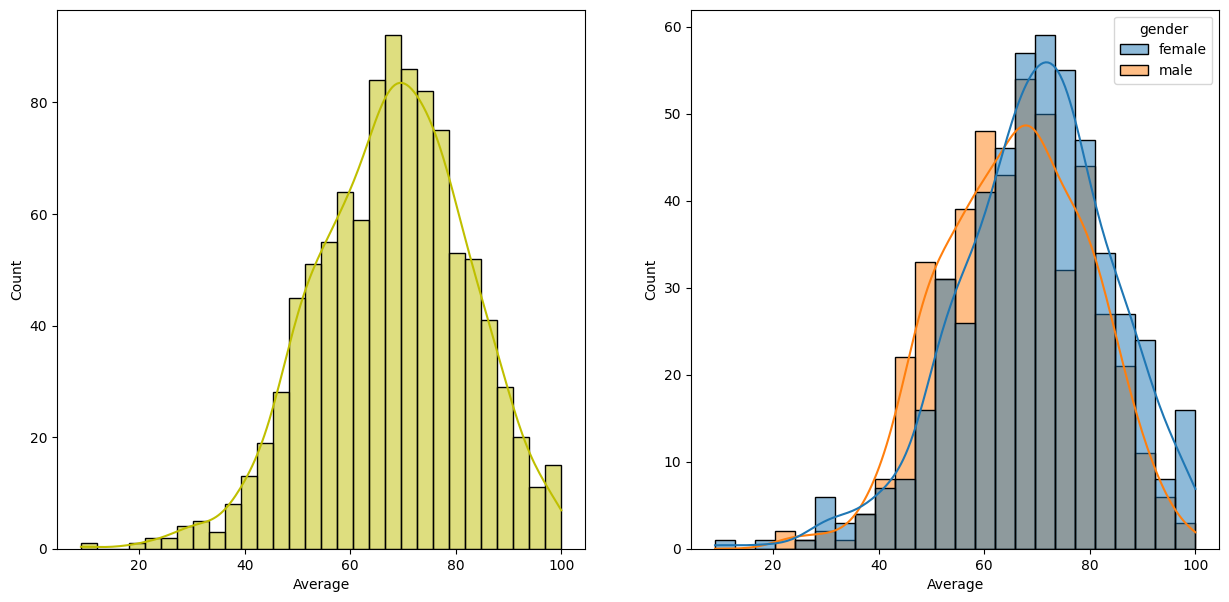

In [55]:
###Exploring Data(Visulaization)

##### Visulizating avergae score to make some conclusion

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue='gender')
plt.show()

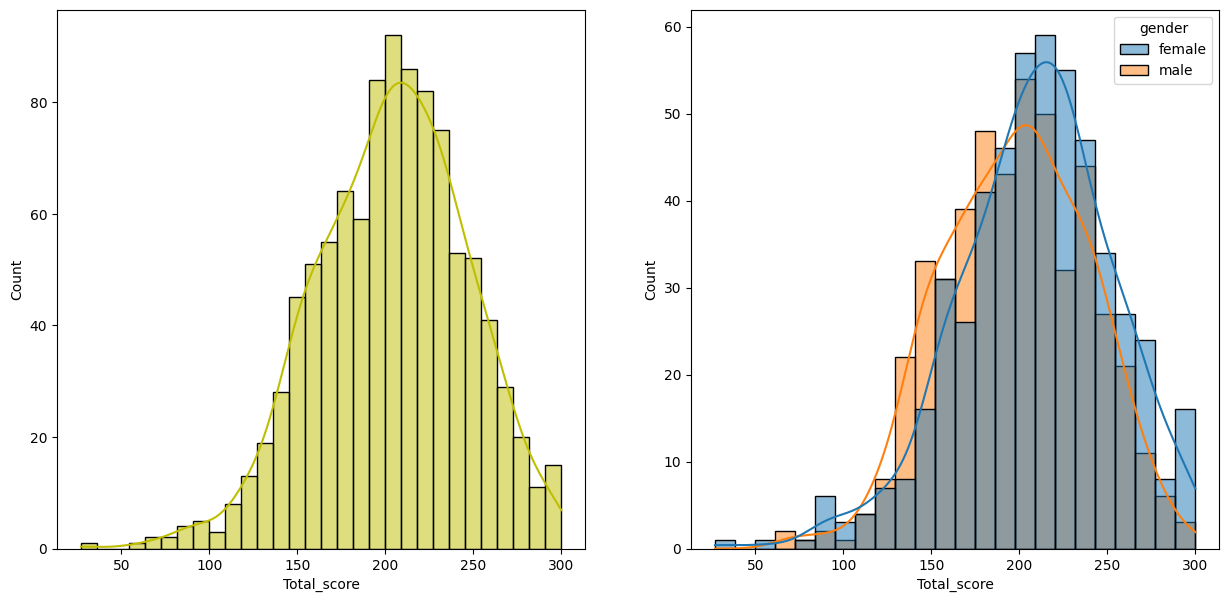

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Total_score',bins=30,kde=True,color='y')
plt.subplot(122)
sns.histplot(data=data,x='Total_score',kde=True,hue='gender')
plt.show()

Insight:

  From the above exploration it's clear that the feamle students tend to perfom better then the male students.

[Text(0.5, 0, 'Average(Male)')]

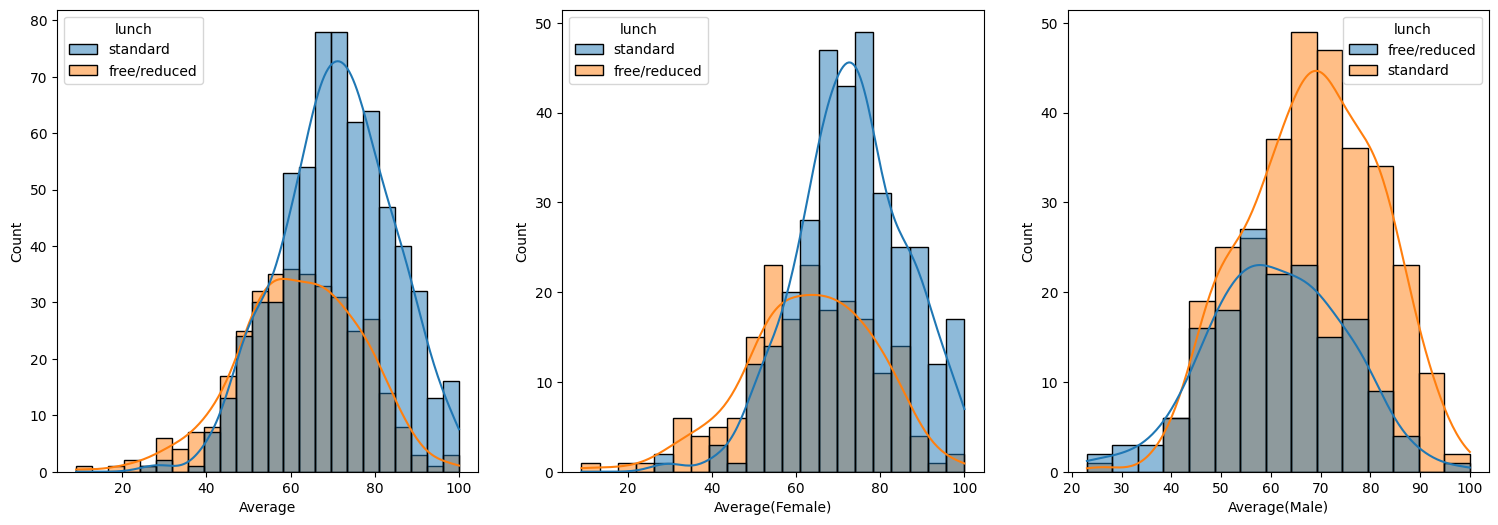

In [68]:
### LUnch data exploration
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x="Average",kde=True,hue="lunch")
plt.subplot(142)
ax = sns.histplot(data=data[data["gender"]=="female"],x="Average",kde=True,hue="lunch")
ax.set(xlabel="Average(Female)")
plt.subplot(143)
ax = sns.histplot(data=data[data["gender"]=="male"],x="Average",kde=True,hue="lunch")
ax.set(xlabel="Average(Male)")

Insight:

     Having a Standard Lunch before the exam has a positive impact on the average exam score, irrespective of the gender of the student.

[Text(0.5, 0, 'Average(Male)')]

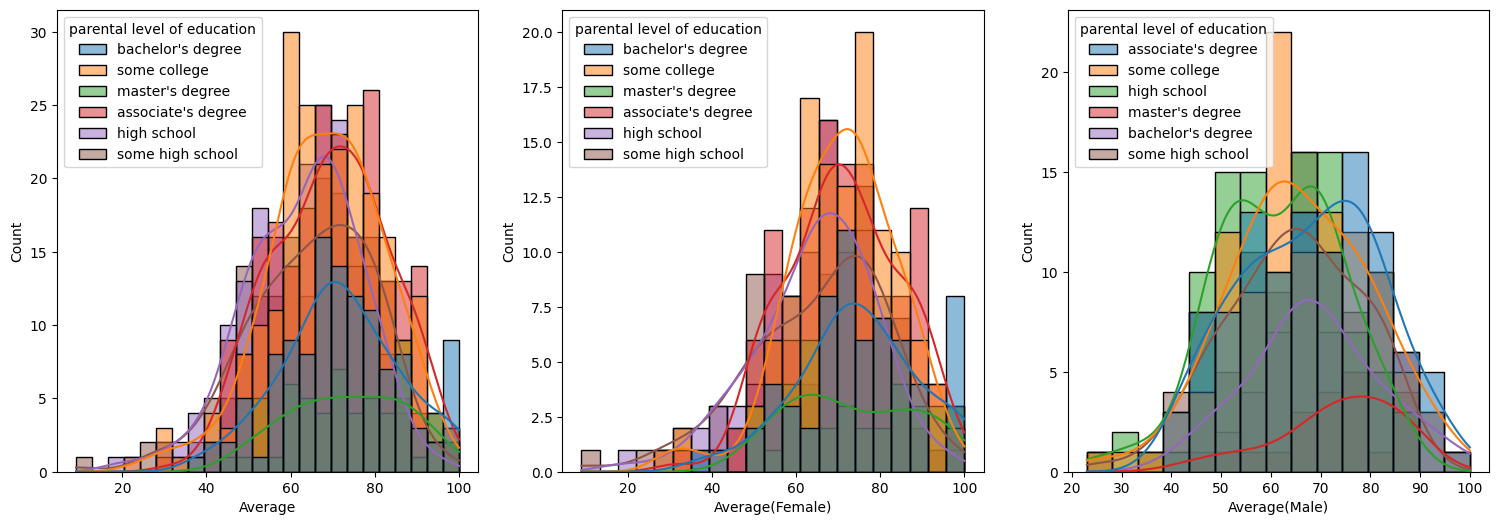

In [69]:
### parental level of education data exploration
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x="Average",kde=True,hue="parental level of education")
plt.subplot(142)
ax = sns.histplot(data=data[data["gender"]=="female"],x="Average",kde=True,hue="parental level of education")
ax.set(xlabel="Average(Female)")
plt.subplot(143)
ax = sns.histplot(data=data[data["gender"]=="male"],x="Average",kde=True,hue="parental level of education")
ax.set(xlabel="Average(Male)")

Insights:

    1. In general parent's higer education does not help students to get high score.

    2. Incase of overall and Female students we oberved that if Parents has gone to "some college" it helped the children to score slightly better then the others.

[Text(0.5, 0, 'Average(Male)')]

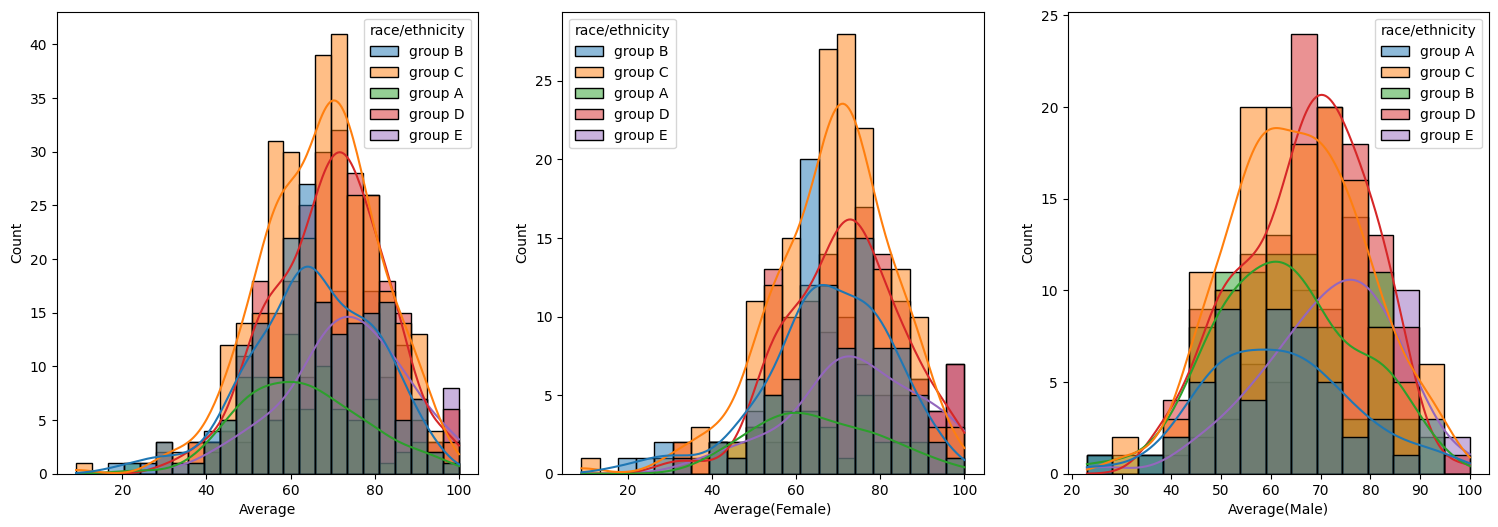

In [70]:
### race/ethnicity data exploration
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x="Average",kde=True,hue="race/ethnicity")
plt.subplot(142)
ax = sns.histplot(data=data[data["gender"]=="female"],x="Average",kde=True,hue="race/ethnicity")
ax.set(xlabel="Average(Female)")
plt.subplot(143)
ax = sns.histplot(data=data[data["gender"]=="male"],x="Average",kde=True,hue="race/ethnicity")
ax.set(xlabel="Average(Male)")

Insight: 

 1. Student in Group A performs poorly in exam.
 2. Student in Group C performs well in exam.

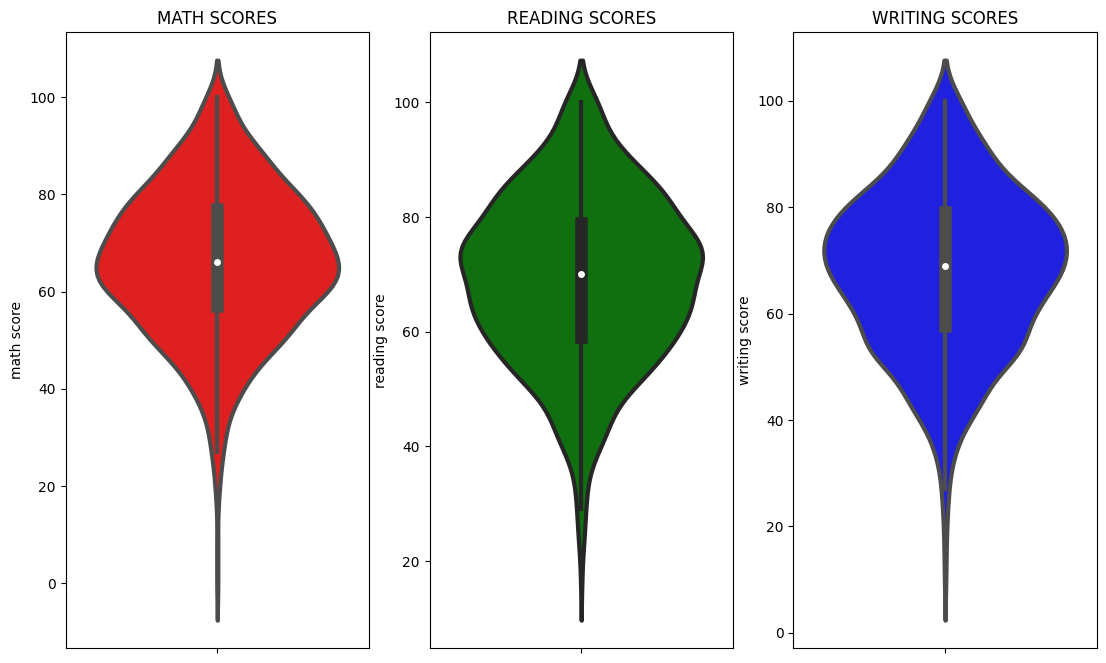

In [71]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

Insight:
    From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80



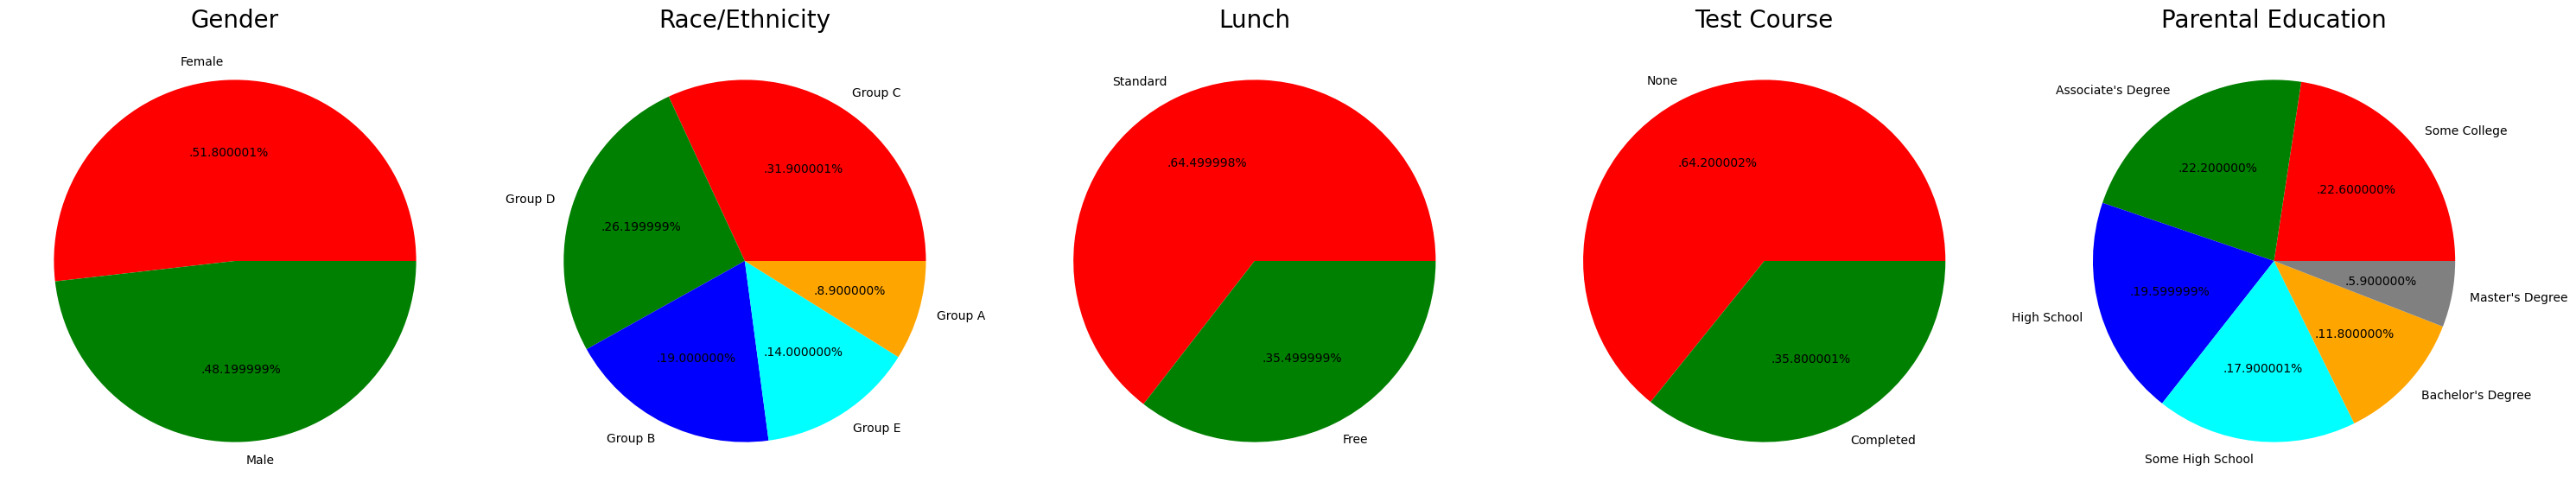

In [74]:
#MultiVaraite analysis using PiePlot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insight:

   1. Number of male and female student is almost equal however female student is slightly high in number.
   2. We have highest number of student from Group C.
   3. Most of the student have standard lunch
   4. Most of the student didn't completed the Test.
   5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization

  GENDER COLUMN


  How is distribution of Gender ?

  
  How is gender has any impact on student's performance ?

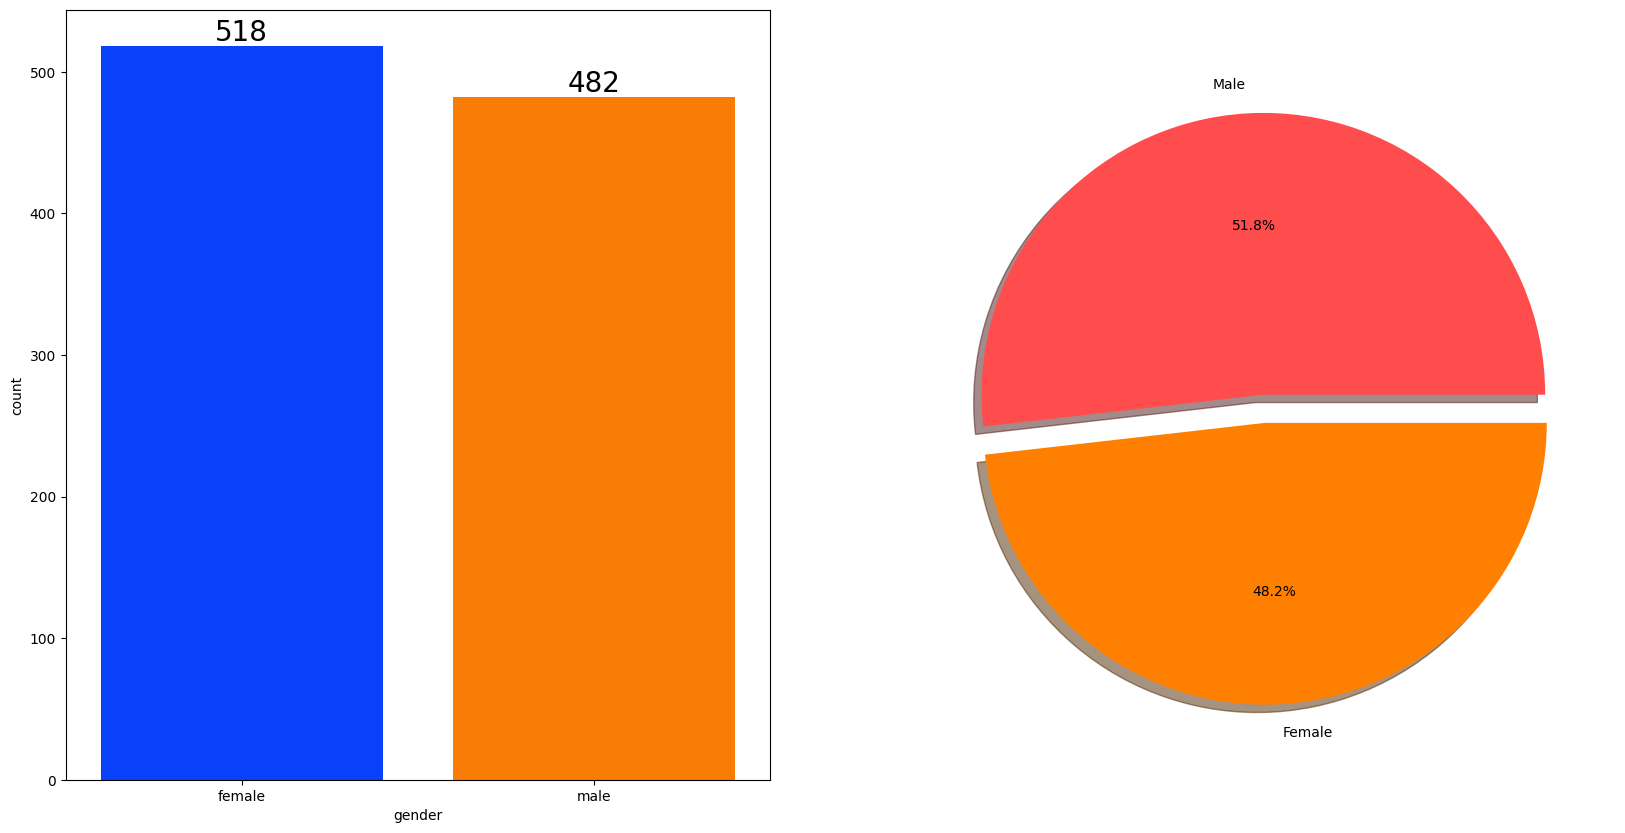

In [75]:
### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [86]:
###BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

gender_group = data.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


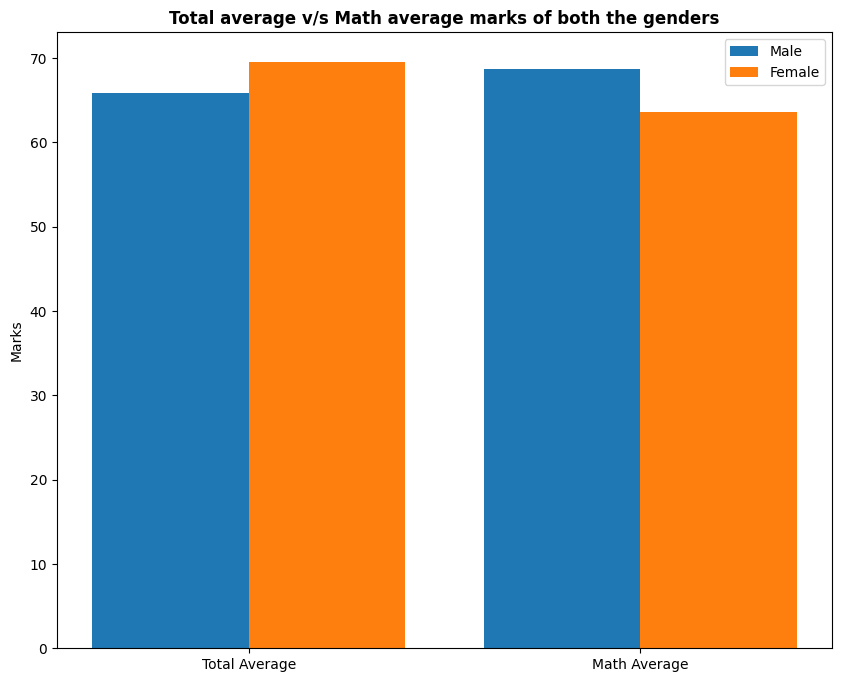

In [88]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
1. On an average females have a better overall score than men.
2. whereas males have scored higher in Maths.

##### RACE/EHNICITY COLUMN
   How is Group wise distribution ?
   Is Race/Ehnicity has any impact on student's performance ?


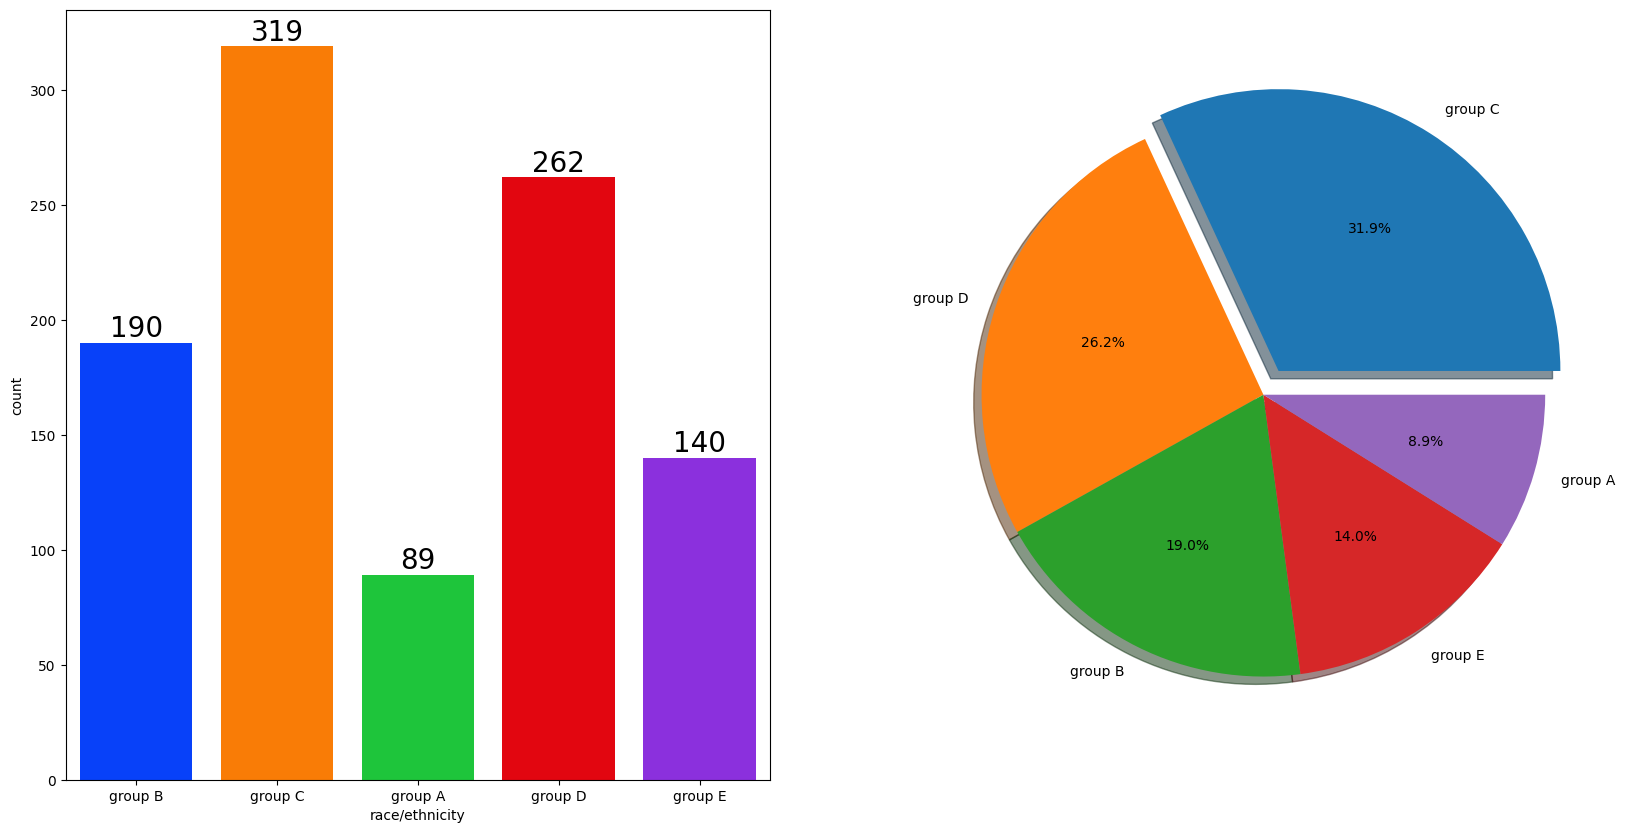

In [90]:
###UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights


Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

In [93]:
###BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Group_data2=data.groupby('race/ethnicity')
Group_data2.mean()

,math score,reading score,writing score,Total_score,Average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


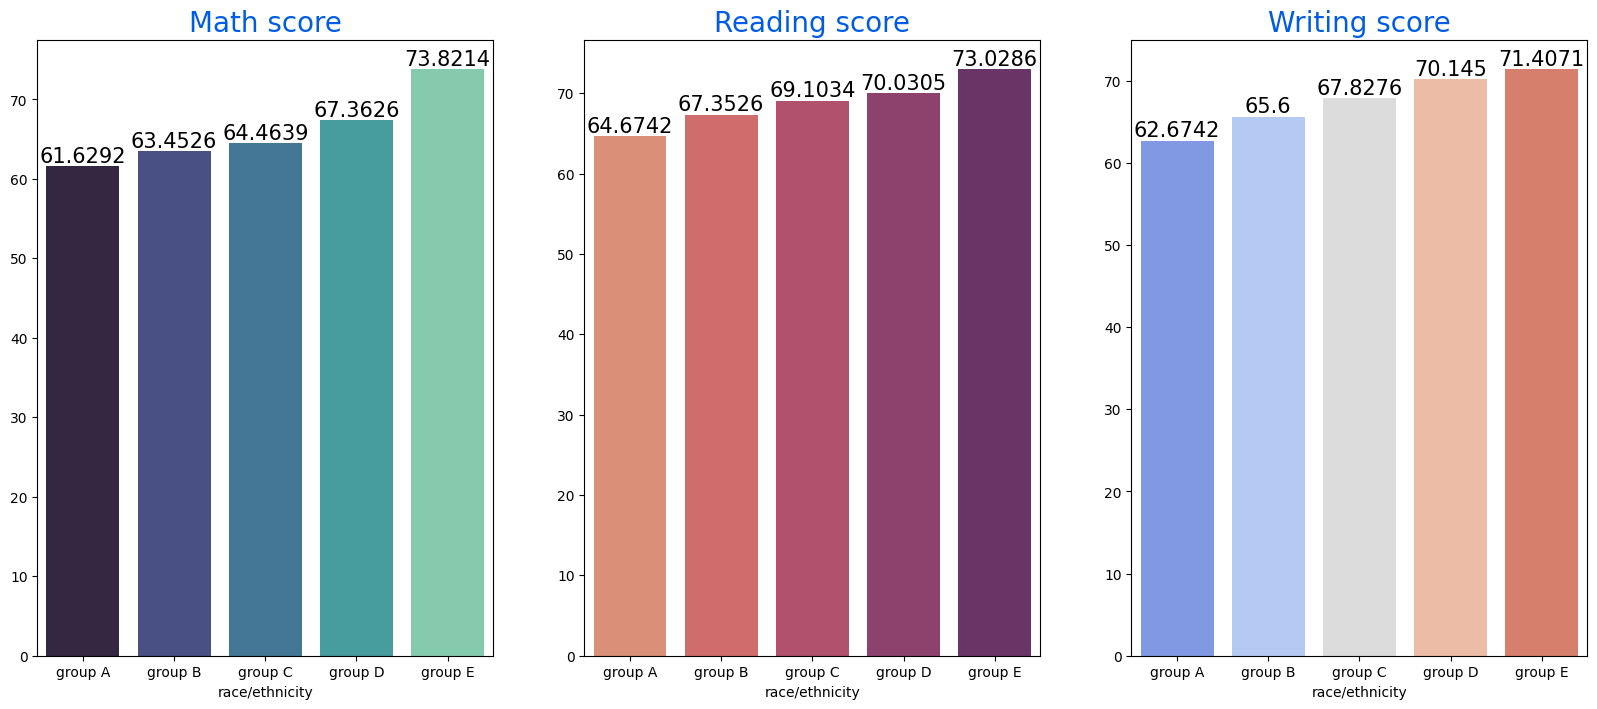

In [94]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

    Group E students have scored the highest marks.
    
    Group A students have scored the lowest marks.
    
    Students from a lower Socioeconomic status have a lower avg in all course subjects

#####PARENTAL LEVEL OF EDUCATION COLUMN

    What is educational background of student's parent ?
    Is parental education has any impact on student's performance ?

In [102]:
####UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('fivethirtyeight')
# sns.countplot(data['parental level of education'], palette = 'Blues')
# plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
# plt.xlabel('Degree')
# plt.ylabel('count')
# plt.show()

In [110]:

#plt.plot(data = data["parental level of education"],type="hist")

<AxesSubplot:title={'center':'Comparison of Parental Education'}>

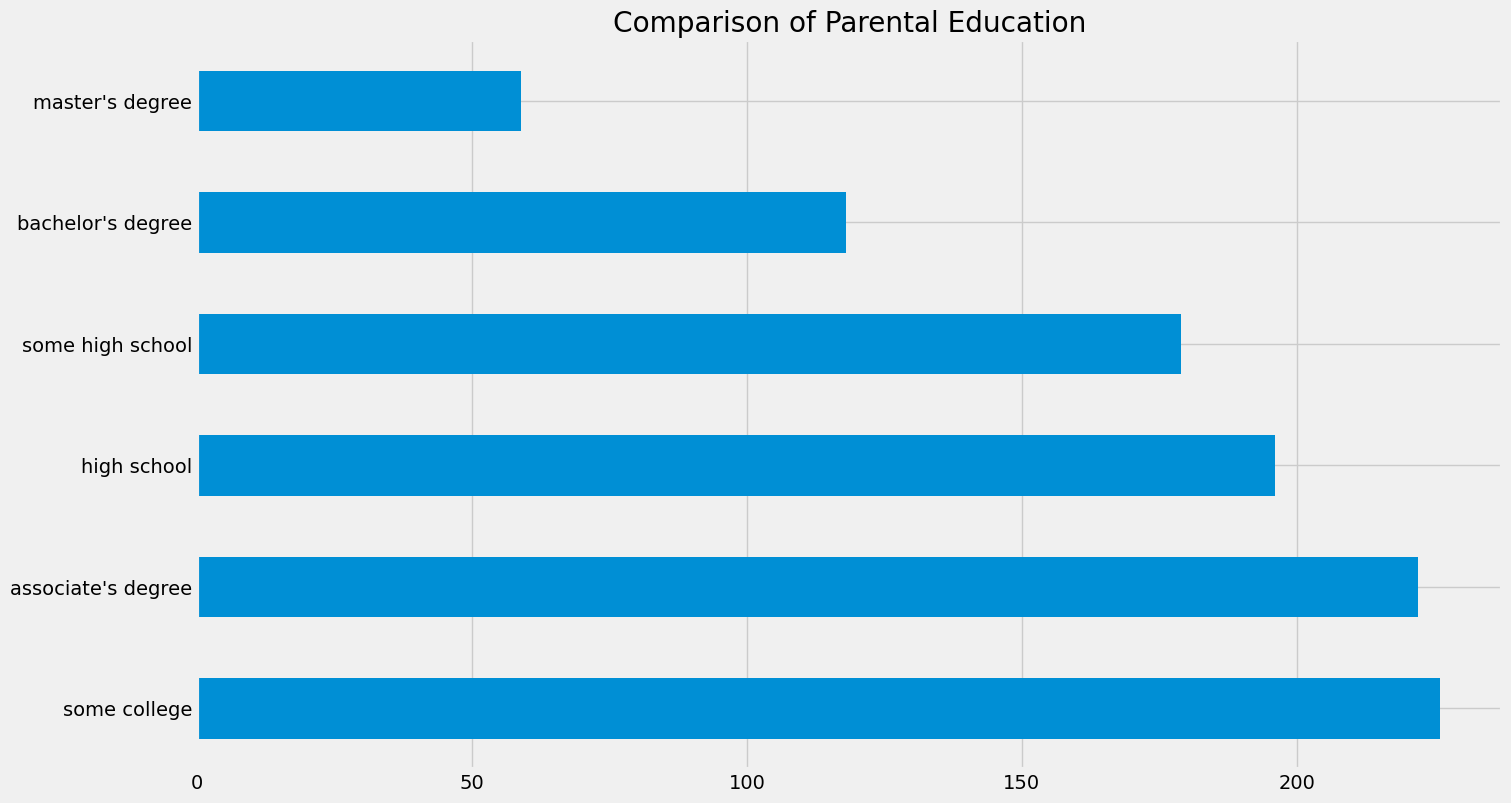

In [112]:
data["parental level of education"].value_counts().plot(kind='barh',title="Comparison of Parental Education")

Insight:

  Largest number of parents are from some college.

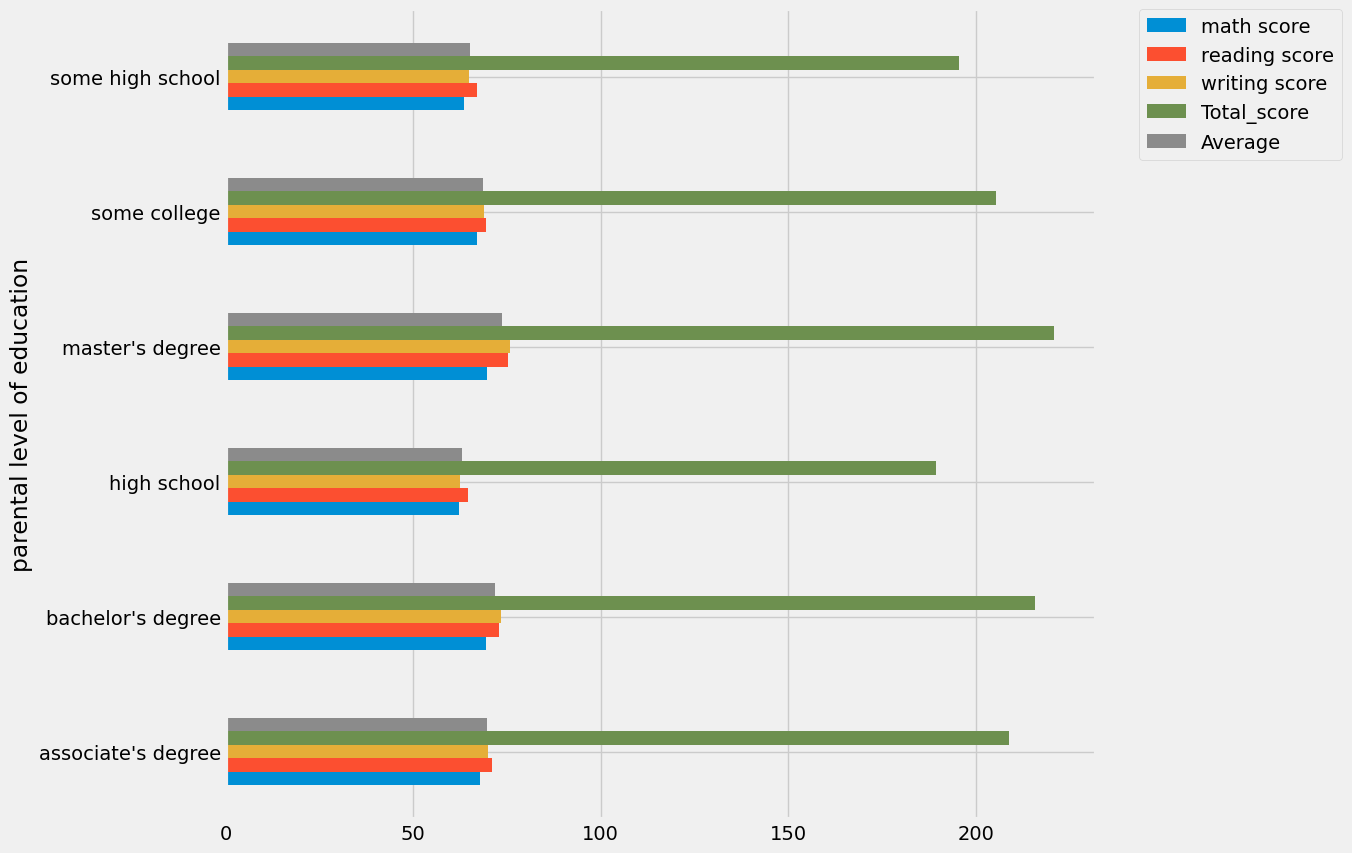

In [114]:
####BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Insights:

    The score of student whose parents possess master and bachelor level education are higher than others.


LUNCH COLUMN


    Which type of lunch is most common amoung students ?
    
    What is the effect of lunch type on test results?

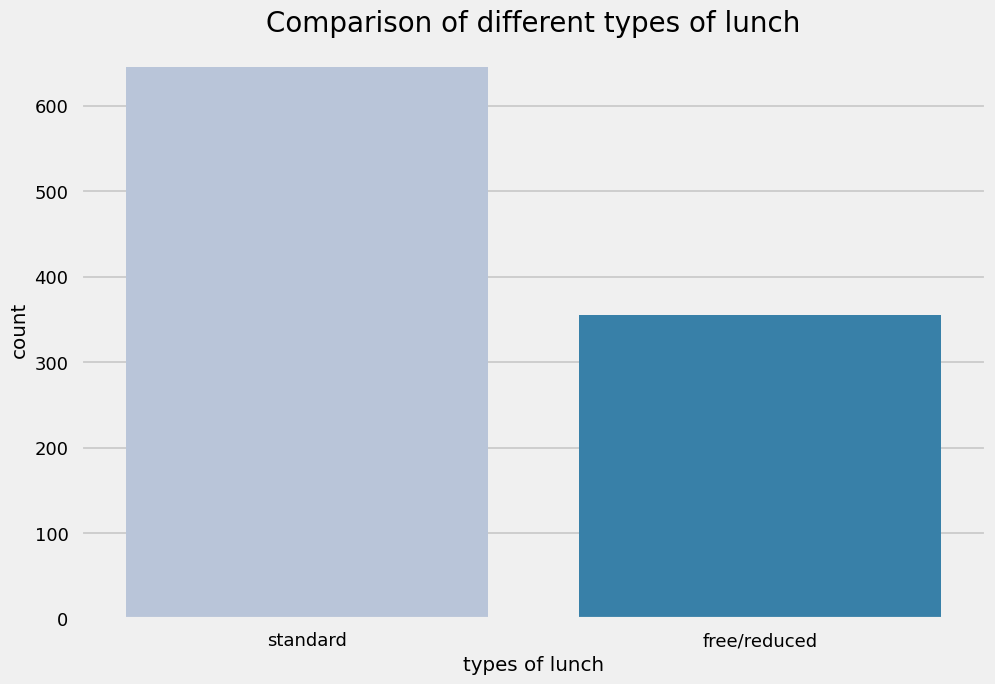

In [122]:
#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data= data,x='lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insight:

 Standard lunch is most common across student

In [130]:
# ####BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

# fig,ax=plt.subplots(1,2,figsize=(20,8))
# sns.countplot(x=data['Insights
# Students who get Standard Lunch tend to perform better than students who got free/reduced lunch'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[0])
# ax[0].set_title('Students Average Score vs Lunch Type ',color='black',size=25)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
    
# sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
# for container in ax[1].containers:
#     ax[1].bar_label(container,color='black',size=20)   

Insights


Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

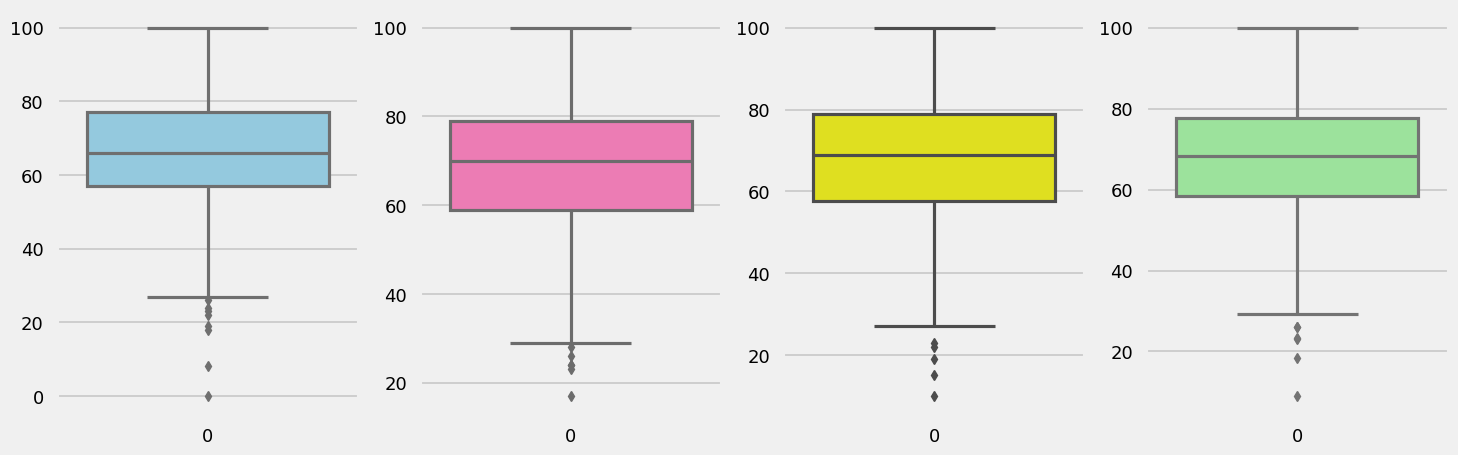

In [133]:
#### CHECKING OUTLIERS

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average'],color='lightgreen')
plt.show()


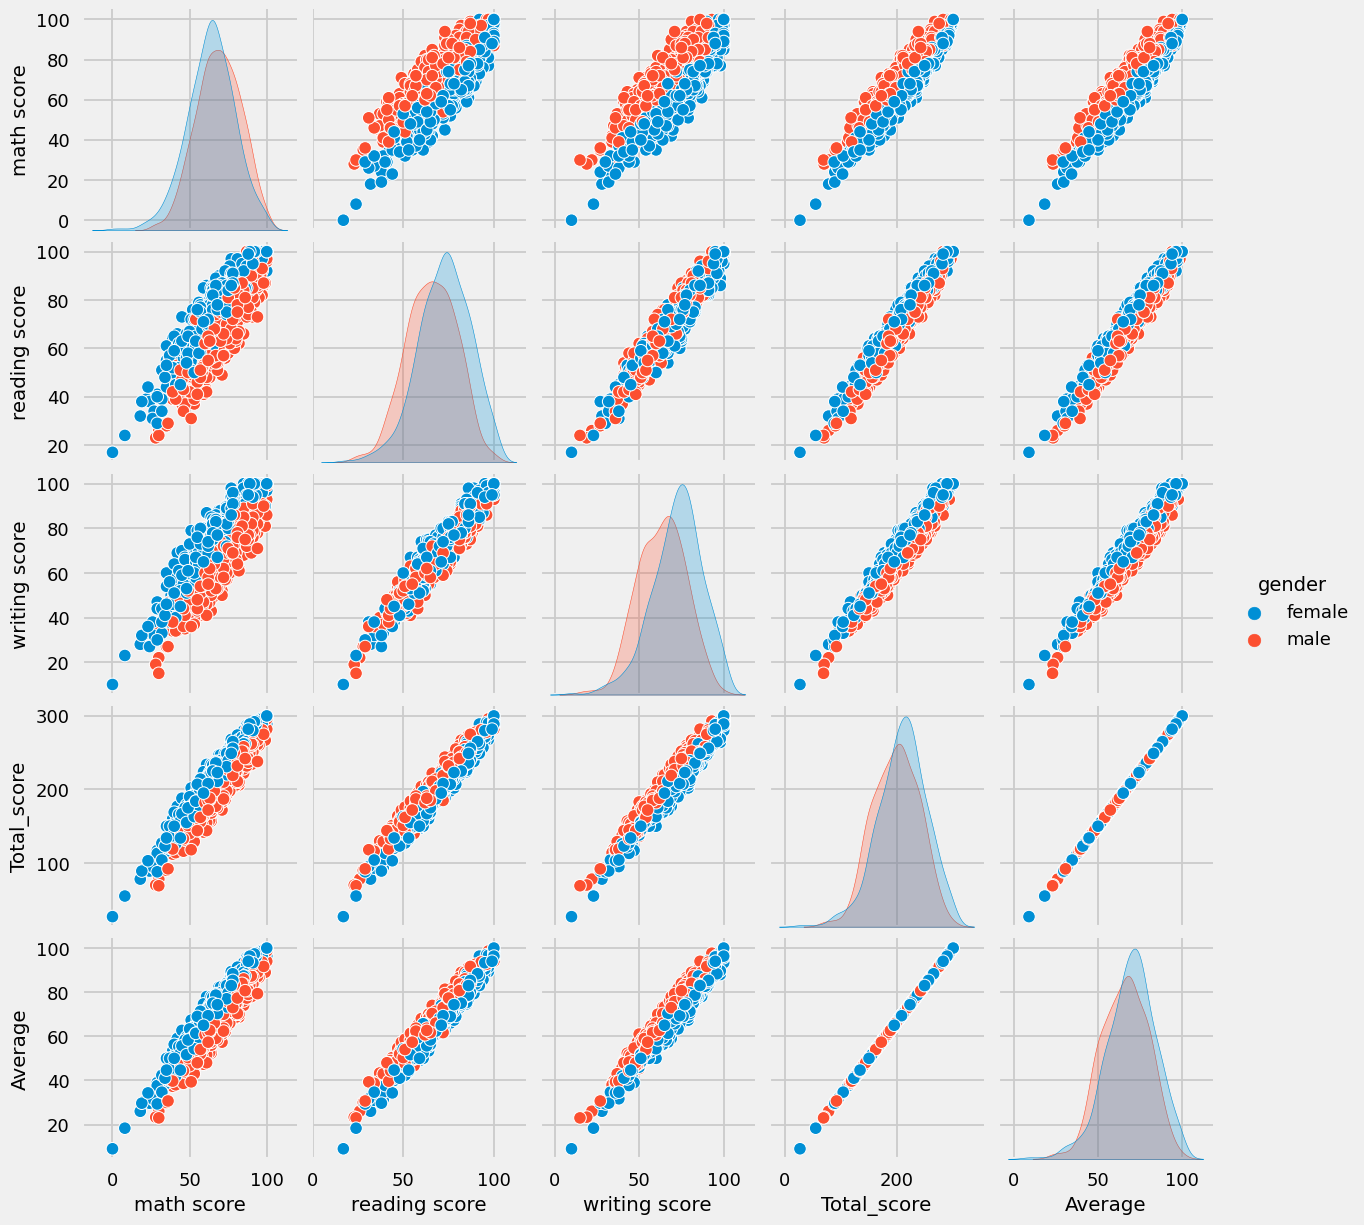

In [134]:
###MUTIVARIATE ANALYSIS USING PAIRPLOT

sns.pairplot(data,hue = 'gender')
plt.show()

Insights
    
     
      From the above plot it is clear that all the scores increase linearly with each other.

Conclusions:


   Student's Performance is related with lunch, race, parental level education

   Females lead in pass percentage and also are top-scorers
   
   Student's Performance is not much related with test preparation course
   
   Finishing preparation course is benefitial.